# AIML421 Assignment 1: Classification and Clustering 
______________________________________________________________________


### Import Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [4]:
%pip install liac-arff

Note: you may need to restart the kernel to use updated packages.


In [5]:
import arff

### Load Datasets

In [7]:
## steel-plates-fault
file_path = 'C:\\Users\\magasamatl\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\steel-plates-fault.arff'

#file_path= 'C:\\Users\\matlo\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\steel-plates-fault.arff'

with open(file_path, 'r') as f:
    data= arff.load(f)


In [8]:
df_s = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])  #ref
#df_s.head()

In [9]:
## Ionosphere 

file_path=  'C:\\Users\\magasamatl\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\ionosphere.arff'
#file_path=  'C:\\Users\\matlo\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\ionosphere.arff'

with open (file_path,'r') as f:
    data= arff.load(f)

df_i= pd.DataFrame(data['data'], columns = [attr[0] for attr in data['attributes']])

#df_i.head(2)

In [10]:
## BankNotes 

file_path=  'C:\\Users\\magasamatl\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\banknotes.arff'
#file_path=  'C:\\Users\\matlo\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\banknotes.arff'

with open (file_path,'r') as f:
    data= arff.load(f)

df_b= pd.DataFrame(data['data'], columns = [attr[0] for attr in data['attributes']])

#df_b.head(2)

## 1. Classification


 Objective: Explore several classifiers in scikit-learn and investigate the hy
perparameter for complexity control for each of these classifiers on three datasets by setting
 the hyperparameter to a range of plausible values and seeing how well it does on ”held out”
 data. To do this you will need train test split from scikit-learn. To get better estimates, sim
ply repeat 50 times with different random splits (set the seed to get reproducible results). For
 simplicity, use a 50:50 train:test split in all cases. For each setting of the hyperparameter, you
 then have a distribution over 50 different classification accuracies on the test set.

In [12]:
# List of datasets
datasets = {
    'Steel': df_s,
    'Ionosphere': df_i,
    'Banknotes': df_b }

# Set the seed with 50 iterations 
seeds = np.random.RandomState(42).randint(0, 10000, size= 50 )

In [13]:
df_s.head()
df_i.head()
df_b.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


#### a) KNeighborsClassifier (K nearest neighbours)

In [15]:
from sklearn.neighbors import  KNeighborsClassifier

knn = KNeighborsClassifier()

##### Train and Fit the Model

In [17]:
# scaling method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#evlaute in a set range of 10 neighbours
n_neighbours_val = list(range(1,6))

#store  results
results_knn = {}

for dataset_name in datasets.keys():
    results_knn[dataset_name]={}
    for n in n_neighbours_val: 
        results_knn[dataset_name][n] = []
    
for dataset_name, df in datasets.items():
    # separate the data into X and classes
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]

    for n_neighbours in n_neighbours_val:
        accuracies = []
        for i in range(50):   # 50 iterations
            # Use a different seed for each iteration
            random_seed = seeds[i]
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state= random_seed)

            #scale data
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            knn = KNeighborsClassifier(n_neighbors=n_neighbours)
            
            #fit the model
            knn.fit(X_train, y_train)

            #predict
            y_pred = knn.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

        results_knn[dataset_name][n_neighbours] = accuracies

### Visualize

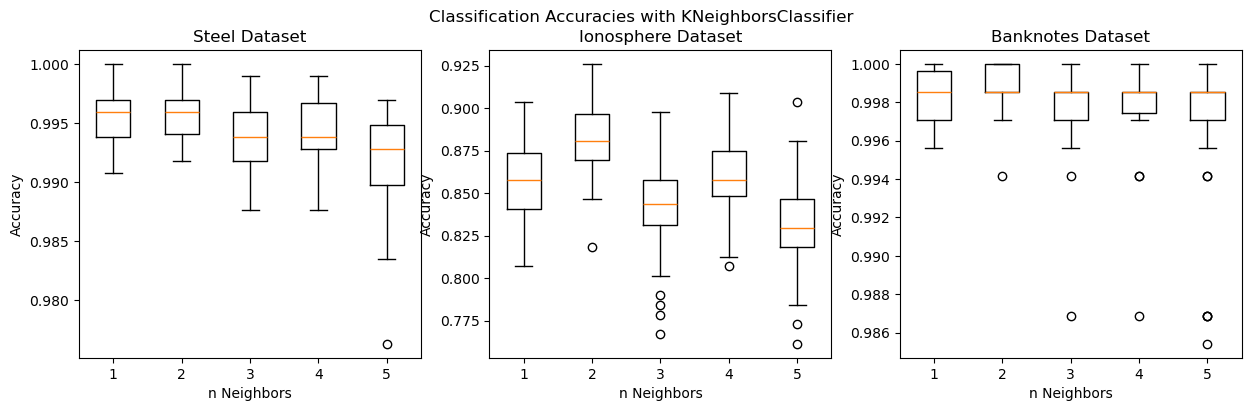

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))#, sharey=True)

for i, (dataset_name, dataset_results) in enumerate(results_knn.items()):
    data_plot = []
    labels = []
    for n_neighbours in n_neighbours_val:
        data_plot.append(dataset_results[n_neighbours])
        labels.append(str(n_neighbours))
    
    axs[i].boxplot(data_plot, labels=labels)
    axs[i].set_title(f'{dataset_name} Dataset')
    axs[i].set_xlabel('n Neighbors')
    axs[i].set_ylabel('Accuracy')

plt.suptitle('Classification Accuracies with KNeighborsClassifier')
plt.show()

#### b) GaussianNB (the Gaussian form of Naive Bayes)

In [21]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()

In [22]:
#hhyperparameter for gnb
var_smoothingval= np.logspace(-9, -1, 1)

results_gnb = {}  

for dataset_name in datasets.keys():
    results_gnb[dataset_name] = {}  
    
    #Looping over each value 
    for vs in var_smoothingval:
        results_gnb[dataset_name][vs] = []

#Training GaussianNB
for dataset_name, df in datasets.items():
  
    X = df.iloc[:, :-1] 
    y = df.iloc[:, -1]

    for var_smoothing in var_smoothingval:
        accuracies = []
        for i in range(50):  
            #seeding
            random_seed = seeds[i]
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)

            # Scale 
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            #Initiate model
            gnb = GaussianNB(var_smoothing=var_smoothing)

            # Fit 
            gnb.fit(X_train, y_train)

            #Predict
            y_pred = gnb.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        
        # Store the accuracies for the current var_smoothing
        results_gnb[dataset_name][var_smoothing] = accuracies

#### c) DecisionTreeClassifier (A decision tree (DT))

In [24]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(random_state=42)


In [25]:
max_depthval = list(range(1, 11)) # hyper param 

results_dtc = {dataset_name: {md: [] for md in max_depthval} for dataset_name in datasets.keys()}


for dataset_name, df in datasets.items():
    
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]

    for max_depth in max_depthval:
        accuracies = []
        for i in range(50): 
            random_seed = seeds[i]
         
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)

            # Scale the data
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

            # Fit the model
            dtc.fit(X_train, y_train)

            # Predict
            y_pred = dtc.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        
        # Store the accuracies for each max_depth
        results_dtc[dataset_name][max_depth] = accuracies

#### d) LogisticRegression 

In [27]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=1000, random_state=42)

In [28]:
C_values = list(range(1, 11)) #defien hyperparameters

results_lg = {dataset_name: {c: [] for c in C_values} for dataset_name in datasets.keys()}

for dataset_name, df in datasets.items():
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]

    for C in C_values:
        accuracies = []
        for i in range(50): 
            random_seed = seeds[i]
         
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)

            # Scale the data
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            lg = LogisticRegression(C=C, max_iter=1000, random_state=42)

            # Fit the model
            lg.fit(X_train, y_train)

            # Predict
            y_pred = lg.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)    # accuracy
            accuracies.append(accuracy)
        
        results_lg[dataset_name][C] = accuracies

#### e) GradientBoostingClassifier (Gradient Boosted DTs)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42, n_estimators=50)

In [31]:
max_depthval = list(range(1, 6))

results_gb = {dataset_name: {ne: [] for ne in max_depthval} for dataset_name in datasets.keys()}
iterations = 50

for dataset_name, df in datasets.items():
  
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]

    for max_depth in max_depthval:
        accuracies = []
        for i in range(iterations):  
            random_seed = seeds[i]
       
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)

            # Scale 
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            gb = GradientBoostingClassifier(max_depth=max_depth, random_state=42)

            # Fit the model
            gb.fit(X_train, y_train)

            ## Predict
            y_pred = gb.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)    # Calculate accuracy
            accuracies.append(accuracy)
        
    #resutls on max depth 
        results_gb[dataset_name][max_depth] = accuracies

#### f) RandomForestClassifier (Random Forest)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

In [34]:
max_depthval = list(range(1, 11))

results_rfc = {dataset_name: {md: [] for md in max_depthval} for dataset_name in datasets.keys()}

# Perform training and evaluation for RandomForestClassifier
for dataset_name, df in datasets.items():
  
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    for max_depth in max_depthval:
        accuracies = []
        for i in range(iterations): 
            random_seed = seeds[i]
          
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            rfc = RandomForestClassifier(max_depth=max_depth, random_state=42)

            rfc.fit(X_train, y_train)
            y_pred = rfc.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        
        results_rfc[dataset_name][max_depth] = accuracies

#### g) MLPClassifier (Neural Network)

In [36]:
from sklearn.neural_network import MLPClassifier

from joblib import Parallel, delayed

In [37]:
alphaval = np.logspace(-4, -1, 10)

results_mlp = {dataset_name: {alpha: [] for alpha in alphaval} for dataset_name in datasets.keys()}

for dataset_name, df in datasets.items():

    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]

    for alpha in alphaval:
        accuracies = []
        for i in range(iterations):  
            random_seed = seeds[i]
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)

            X_train = scaler.fit_transform(X_train)  ##scaled 
            X_test = scaler.transform(X_test)

            mlp = MLPClassifier(alpha=alpha, max_iter=1000, random_state=42)

            # Fit the model
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test) #predict

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        
        #results
        results_mlp[dataset_name][alpha] = accuracies

### Visualization:

In [39]:
models = ['KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'LogisticRegression', 
                'GradientBoostingClassifier', 'RandomForestClassifier', 'MLPClassifier']
hyperparameters = ['n_neighbors','var_smoothing', 'max_depth', 'C', 'max_depth', 'max_depth', 'alpha']

results_list = [results_knn, results_gnb, results_dtc, results_lg, results_gb, results_rfc, results_mlp]


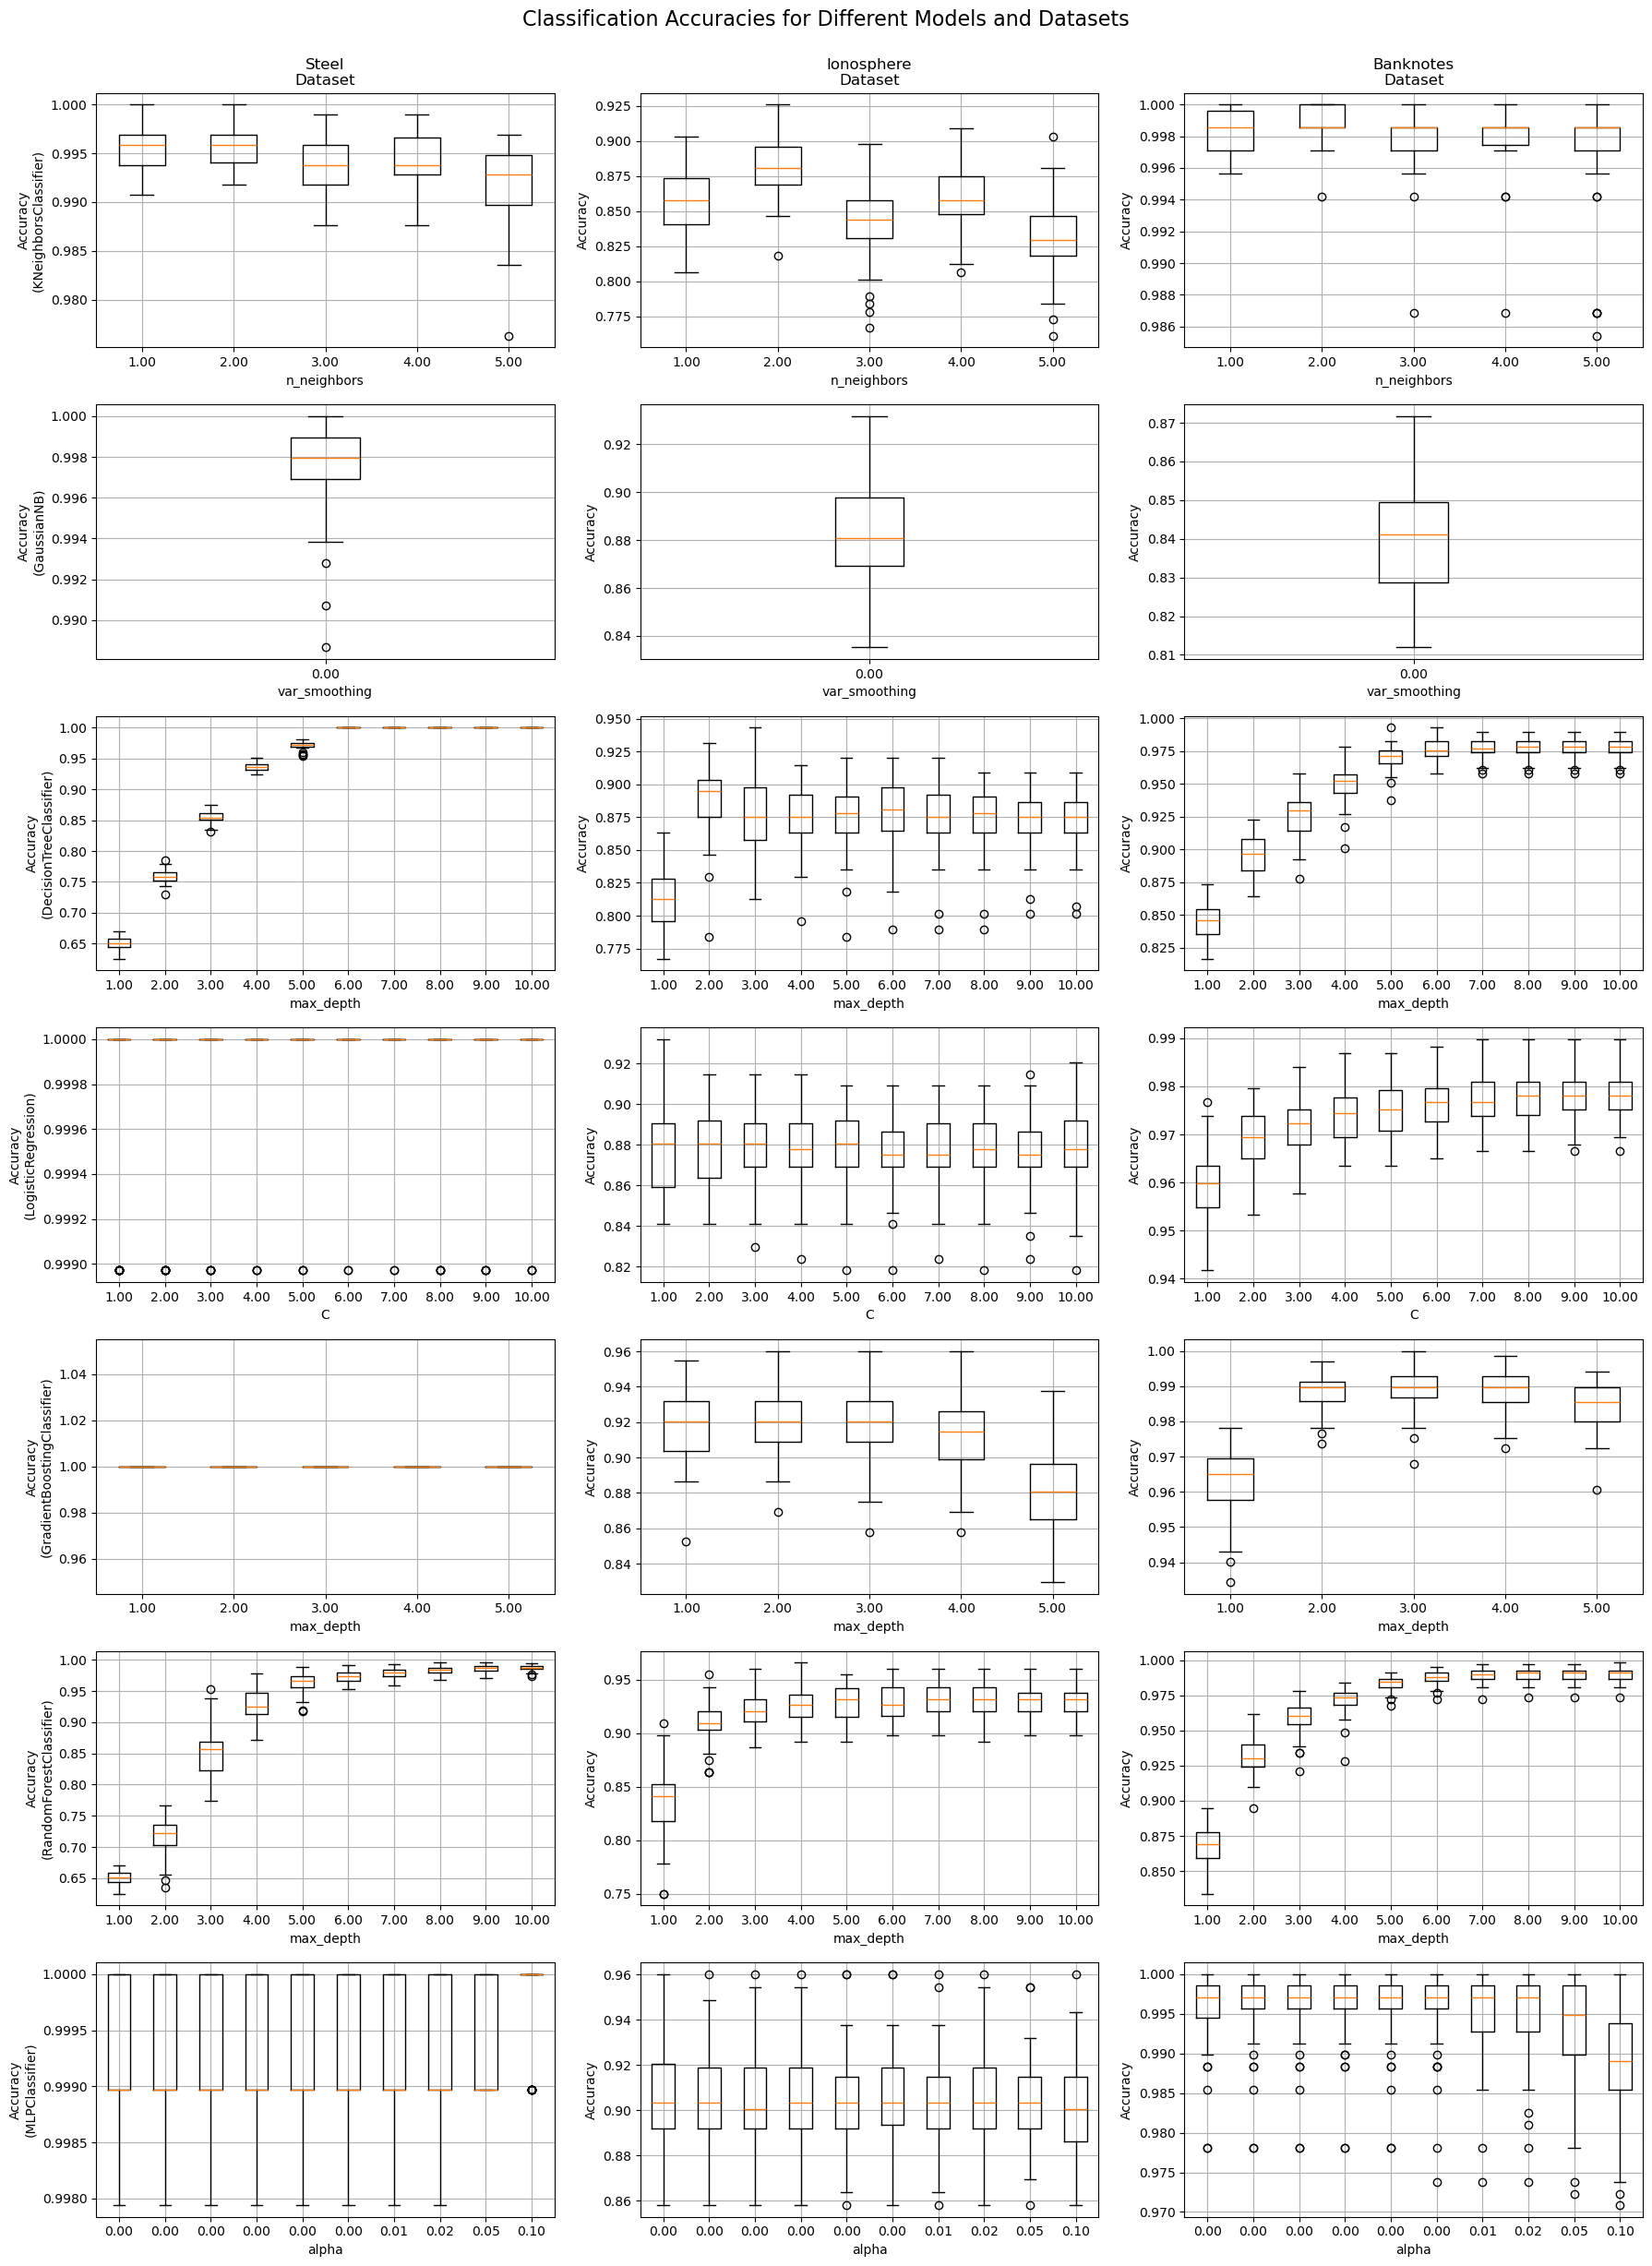

<Figure size 640x480 with 0 Axes>

In [72]:
#Plot
fig, axs = plt.subplots(7, 3, figsize=(18, 25))
fig.suptitle('Classification Accuracies for Different Models and Datasets', fontsize=16)


for row, model_name in enumerate(models):
    title = models[row]
    param_name = hyperparameters[row]
    results = results_list[row]

    for col, dataset_name in enumerate(datasets.keys()):
        data_plot = []
        labels = []
        
 
        for param in results[dataset_name]:
            data_plot.append(results[dataset_name][param])
            
            # these parameter results have high decimals... reduce to 2 
            if param_name in ['n_neighbors', 'max_depth', 'var_smoothing', 'C', 'alpha']:  #
                labels.append(f'{param:.2f}')
            else:
                labels.append(str(param))
        

         ## the boxplots visualisation
        axs[row, col].boxplot(data_plot, labels=labels)
        axs[row, col].set_xlabel(param_name)
        axs[row, col].set_ylabel('Accuracy')
        axs[row, col].grid(True)

        
        if row == 0:
            axs[row, col].set_title(f'{dataset_name}\nDataset', fontsize=12)
        if col == 0:
            axs[row, col].set_ylabel(f'Accuracy\n({model_name})', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

plt.savefig('classification accuracy table.jpg', format='jpeg')


### Summary Tables:

In [74]:
hyperparam = {
    'KNeighborsClassifier': {'n_neighbors': [1, 2, 3, 4, 5]},
    'GaussianNB': {'var_smoothing': [1e-9, 1e-5, 1e-1]},
    'LogisticRegression': {'C': [0.1, 0.5, 1.0, 2.0, 5.0]},
    'DecisionTreeClassifier': {'max_depth': [1, 3, 5, 8, 10]},
    'GradientBoostingClassifier': {'max_depth': [1, 3, 5, 8, 10]},
    'RandomForestClassifier': {'max_depth': [1, 3, 5, 8, 10]},
    'MLPClassifier': {'alpha': [1e-5, 1e-3, 0.1, 10.0]}
}


In [75]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier,
    'GaussianNB': GaussianNB,
    'LogisticRegression': LogisticRegression,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'GradientBoostingClassifier': GradientBoostingClassifier,
    'RandomForestClassifier': RandomForestClassifier,
    'MLPClassifier': MLPClassifier
}

In [76]:
# Function to compute the mean test error  ### ChatGPT referenced
def compute_mean_errors(results):
    mean_errors = {}
    for param in results:
        mean_errors[param] = np.mean([1 - acc for acc in results[param]])
    return mean_errors

In [77]:
mean_errors = {clf: {} for clf in hyperparam.keys()}
best_hyperparam = {clf: {} for clf in hyperparam.keys()}

for clf_name, clf_class in classifiers.items():
    param_name, param_values = list(hyperparam[clf_name].items())[0]
    
    for dataset_name, df in datasets.items():
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        
        results = {param: [] for param in param_values}
        
        for param in param_values:
            for i in range(iterations):
                random_seed = seeds[i]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
                
                model = clf_class(**{param_name: param})
                
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                
                accuracy = accuracy_score(y_test, y_pred)
                results[param].append(accuracy)
        
        #get mean test errors and best hyperparameters
        mean_err_data = compute_mean_errors(results)
        best_param = min(mean_err_data, key=mean_err_data.get)
        best_me = mean_err_data[best_param]
        
        mean_errors[clf_name][dataset_name] = best_me
        best_hyperparam[clf_name][dataset_name] = best_param

C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

In [78]:
#Create data frames
mean_errDF = pd.DataFrame(mean_errors)
best_hyperparamDF = pd.DataFrame(best_hyperparam)

# Transpose the DataFrames 
mean_err_df = mean_errDF.T                      
best_hyperparamDF = best_hyperparamDF.T

In [79]:
print("Table 1: Lowest Mean Test Errors")
mean_errDF

Table 1: Lowest Mean Test Errors


,KNeighborsClassifier,GaussianNB,LogisticRegression,DecisionTreeClassifier,GradientBoostingClassifier,RandomForestClassifier,MLPClassifier
Steel,0.004119,0.002513,0.000062,0.000000,0.000000,0.013409,0.000247
Ionosphere,0.116818,0.116477,0.120909,0.118295,0.081364,0.067045,0.122500
Banknotes,0.001458,0.159592,0.024956,0.022478,0.011108,0.009913,0.021224


In [80]:
print("Table 2: Hyperparameter for Best Error")
best_hyperparamDF


Table 2: Hyperparameter for Best Error


,Steel,Ionosphere,Banknotes
KNeighborsClassifier,2.000000e+00,2.00000,2.000000e+00
GaussianNB,1.000000e-09,0.00001,1.000000e-09
LogisticRegression,5.000000e+00,2.00000,5.000000e+00
DecisionTreeClassifier,8.000000e+00,5.00000,1.000000e+01
GradientBoostingClassifier,1.000000e+00,3.00000,3.000000e+00
RandomForestClassifier,1.000000e+01,10.00000,1.000000e+01
MLPClassifier,1.000000e-01,0.10000,1.000000e-03


### Analysis

The analysis of test errors across different datasets showed that some classifiers performed exceptionally well. Both the Gradient Boosting Classifier and Decision Tree Classifier had no errors on the Steel dataset, this is a perfect fit but could suggest overfitting. However, it also shows these models are highly effective for this type of data. The MLP Classifier also performed very well on the Steel and Banknotes datasets.
On the other hand, the Random Forest Classifier and MLP Classifier worked well across various datasets. Logistic Regression model, did well on the Steel dataset but was inconsistent on others.
The Ionosphere dataset proved difficult for most classifiers, as they all had higher error rates. This suggests that this dataset is complex and may require more advanced models or better tuning of model’s parameters. When looking at hyperparameters, the GaussianNB model's hyperparameters stayed consistent across all datasets, showing it is stable and less sensitive to changes. 


__________________________________________________

## 2 Clustering

Objective:  Explore the characteristics of different clustering al
gorithms by testing them on three toy datasets.

In [85]:
from sklearn.datasets import make_blobs, make_classification, make_circles

In [86]:
## Create toy dataset
random_state = 0

blobs, _= make_blobs(n_samples=1000, n_features = 2, random_state=random_state) #
classif, _= make_classification(n_samples=1000, n_informative=2, n_clusters_per_class=1, random_state=random_state)
circles, _ = make_circles(n_samples=1000, noise=0.3, random_state=random_state)

datasets = {
    'Blobs': blobs,
    'Classification': classif,
    'Circles': circles
}

Text(0.5, 1.0, 'Circles')

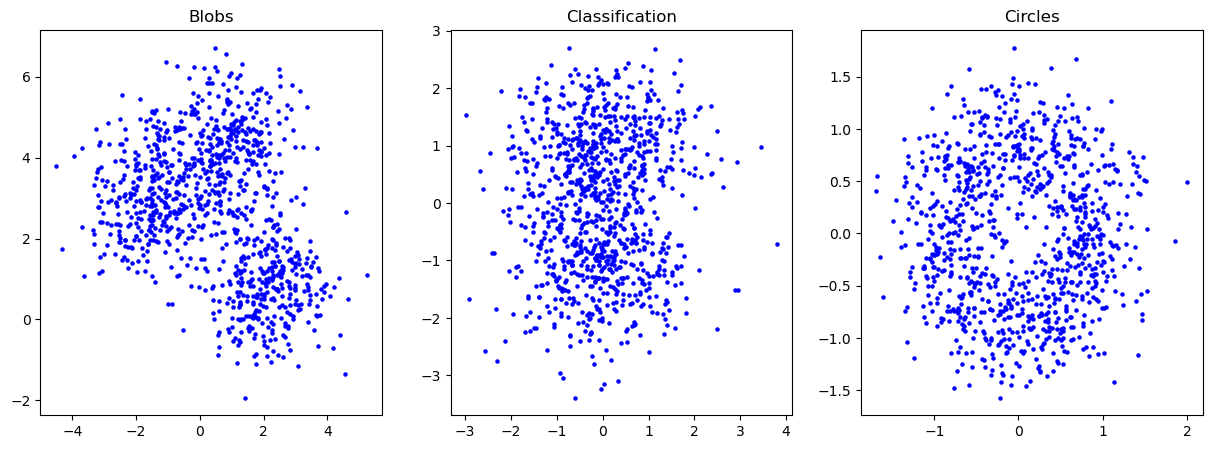

In [87]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(blobs[:, 0], blobs[:, 1], c='blue', s=5)
axs[0].set_title('Blobs')

axs[1].scatter(classif[:, 0], classif[:, 1], c='blue', s=5)
axs[1].set_title('Classification')

axs[2].scatter(circles[:, 0], circles[:, 1], c='blue', s=5)
axs[2].set_title('Circles')


In [88]:
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, Birch, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture


In [89]:
import os
# To offset KMeans memory leak warning     
os.environ['OMP_NUM_THREADS'] = '4'      #refernece ChatGPT

C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

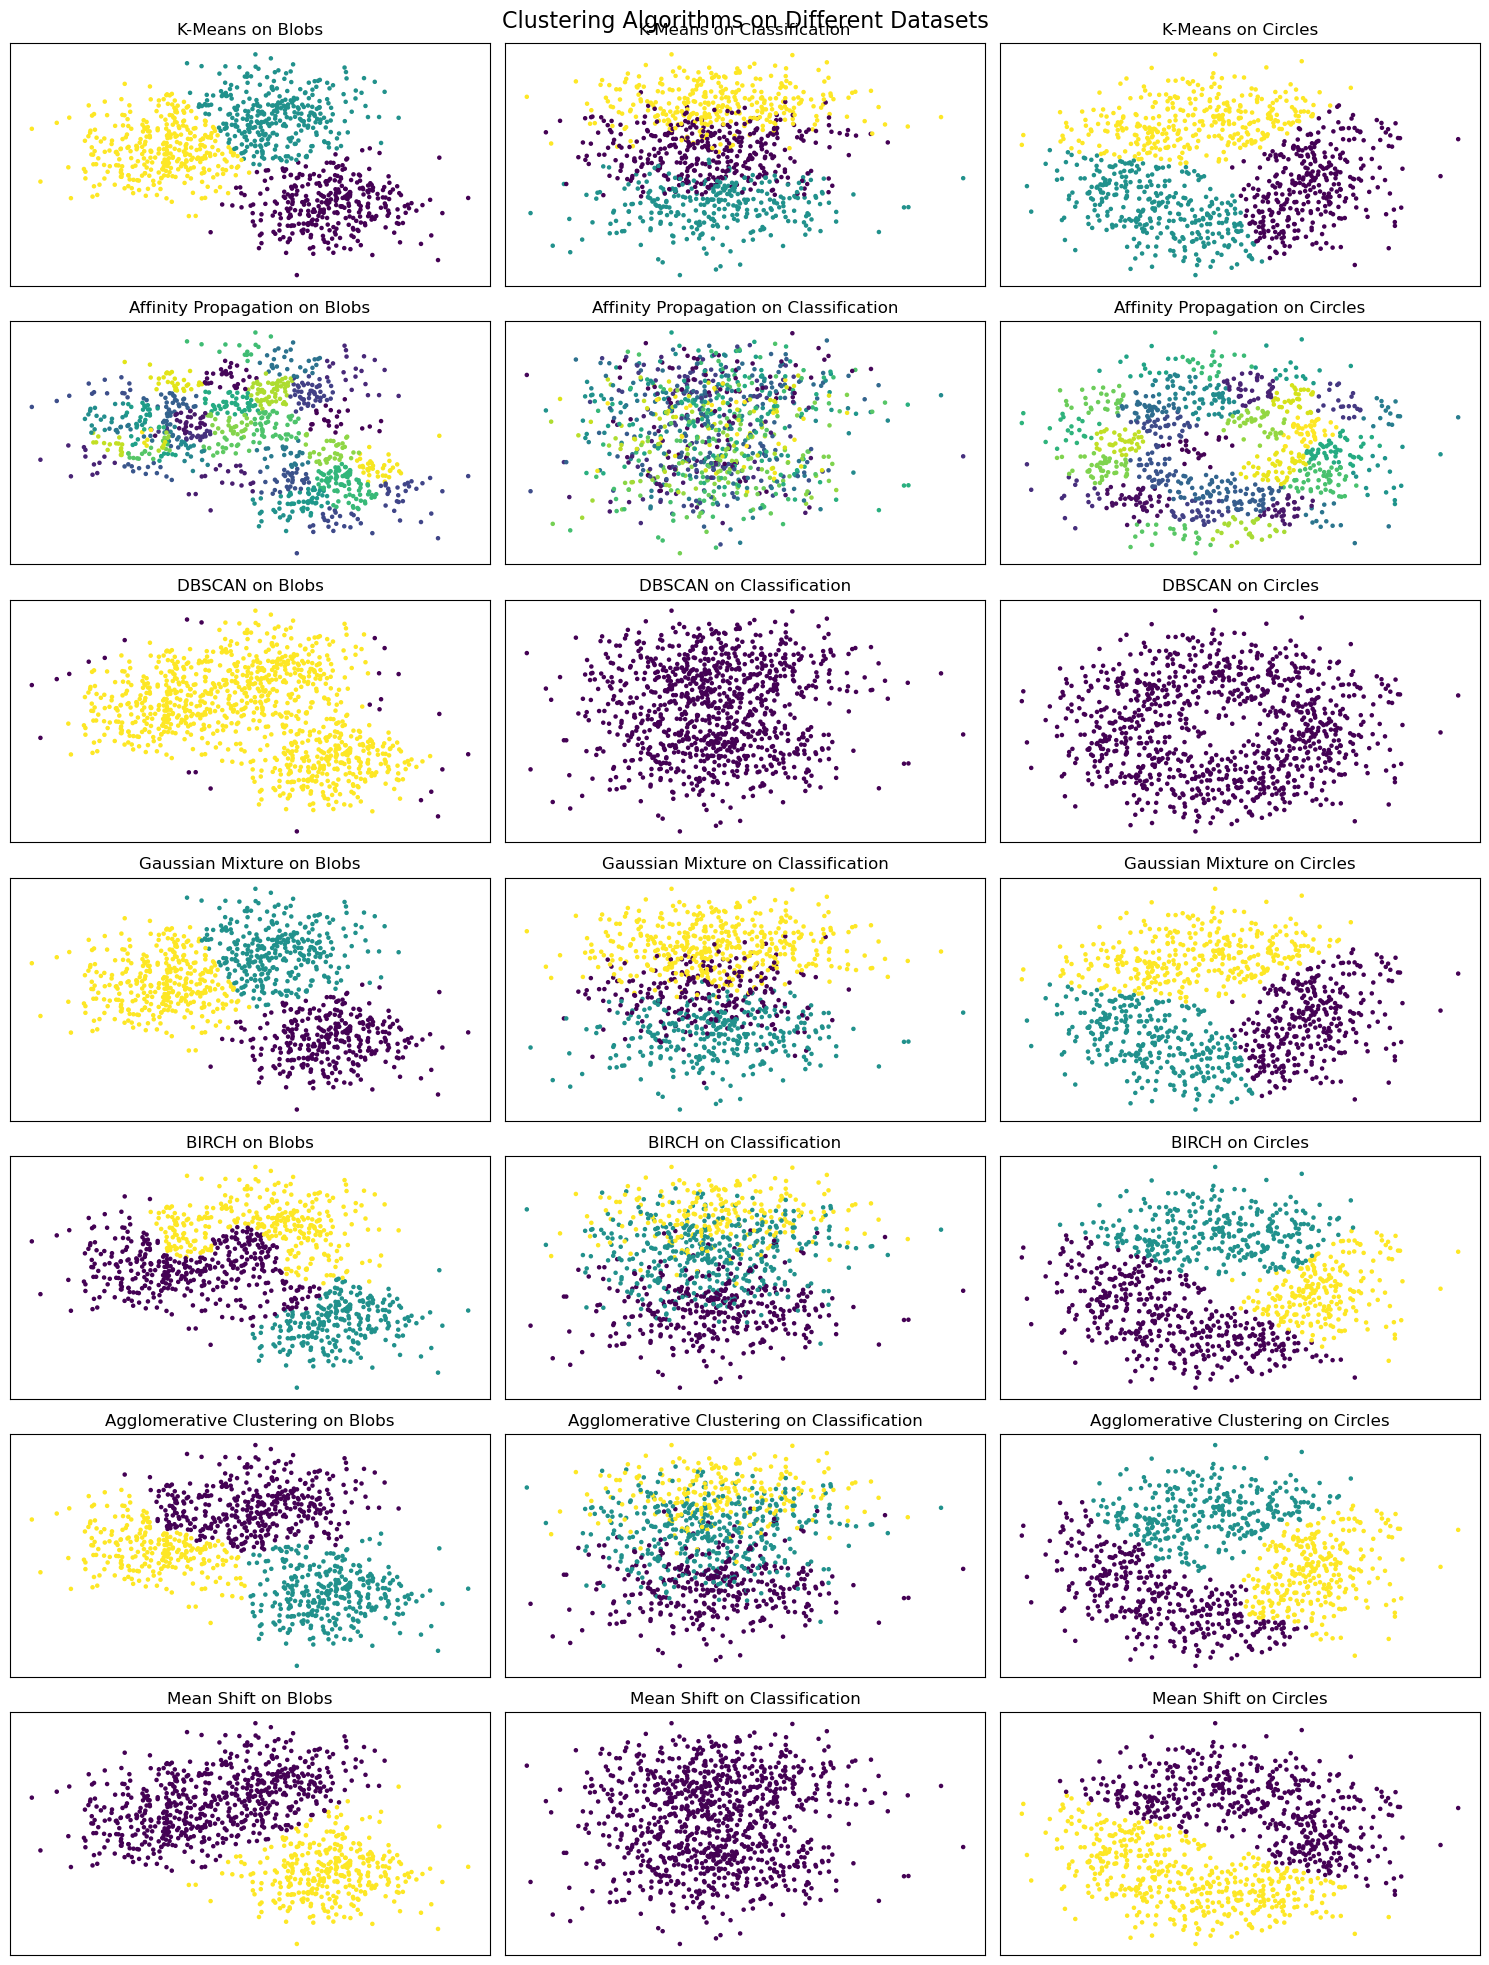

In [90]:
#clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state=random_state),
    'Affinity Propagation': AffinityPropagation(random_state=random_state),
    'DBSCAN': DBSCAN(),
    'Gaussian Mixture': GaussianMixture(n_components=3, random_state=random_state),
    'BIRCH': Birch(n_clusters=3),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'Mean Shift': MeanShift()
}

# # 7 by 3 Table
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
fig.suptitle('Clustering Algorithms on Different Datasets', fontsize=16)

# Fit the clustering models and plot the results
for row, (name, algorithm) in enumerate(clustering_algorithms.items()):
    for col, (dataset_name, X) in enumerate(datasets.items()):
      
        algorithm.fit(X)  #fitting model
        
        #Predict 
        if hasattr(algorithm, 'labels_'):                       #Reference Chat
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        # Plot 
        axs[row, col].scatter(X[:, 0], X[:, 1], c=y_pred, s=5, cmap='viridis')
        axs[row, col].set_title(f'{name} on {dataset_name}')
        axs[row, col].set_xticks([])
        axs[row, col].set_yticks([])

plt.tight_layout()
plt.show()

### Analysis:

The K-Means, Gaussian Mixture Model (GMM), Agglomerative, and BIRCH showed nearly identical results. These models successfully divided each dataset into three distinct clusters. Their performance is likely due to their reliance on distance-based metrics. Though Kmeans, Birch and GMM do not do as well as Agglomerative model when it comes to clustering circular/ data with non linear clusters. On the other hand, Agglomerative and BIRCH tended to have overlaps in clusters for the Classification dataset, probably because of their hierarchical structure and sensitivity to changes in data density.
DBSCAN, which is based on density, did not form three clusters like the other models. It produced only one cluster for the Classification and Circles datasets. This behaviour is due to DBSCAN's focus on high-density areas, ignoring or classifying sparse regions as noise.
The Mean Shift model formed only two clusters for the Blobs and Circles datasets and one for the Classification dataset. This suggests that Mean Shift’s default bandwidth, which affects its sensitivity to data density, might have been too large to detect finer differences in the Classification dataset.
Affinity Propagation did not perform well across all datasets, resulting in too many clusters. This poor performance can be traced back to its sensitivity to the 'preference' parameter, which influences how many data points are chosen as cluster centres.


___________________________________________

# 3 Clustering and Classification

In [95]:
from sklearn import datasets

iris = datasets.load_iris()

In [96]:
X = iris.data
y = iris.target


In [97]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
cluster_labels = kmeans.labels_.reshape(-1, 1)

# Adding the cluster labels in a col-
X_w_clust = np.hstack((X, cluster_labels))   

#df_iris['cluster'] = cluster_labels

C:\Users\magasamatl\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
# Repeat 100 times
repeats = 100

#a) Training without new feature
accuracies_without = []

#b) training with feature
accuracies_with = []

for _ in range(repeats):
     #Data split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=_)  # the data without feature 
    X_train_with, X_test_with, y_train_with, y_test_with= train_test_split(X_w_clust, y, test_size=0.95, random_state=_)
    
      # Training without
    without_f = GaussianNB()
    without_f.fit(X_train, y_train)
    y_pred_without = without_f.predict(X_test)
    accuracy_without = accuracy_score(y_test, y_pred_without)
    accuracies_without.append(accuracy_without)
    
     # Training with feature 
    with_f = GaussianNB()
    with_f.fit(X_train_with, y_train)
    y_pred_with = with_f.predict(X_test_with)
    accuracy_with= accuracy_score(y_test, y_pred_with)
    accuracies_with.append(accuracy_with)


### Visualize 

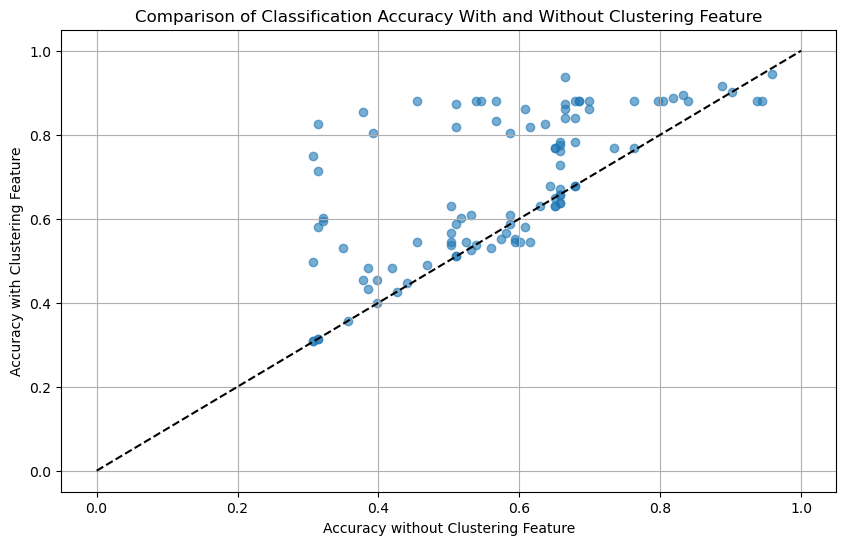

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(accuracies_without, accuracies_with, alpha =0.6)
plt.title('Comparison of Classification Accuracy With and Without Clustering Feature')
plt.xlabel('Accuracy without Clustering Feature')
plt.ylabel('Accuracy with Clustering Feature')
plt.plot([0, 1], [0, 1], 'k--')
plt.grid(True)
plt.show()

In [101]:

plt.savefig('part3.jpg', format='jpeg')

<Figure size 640x480 with 0 Axes>

### Analysis

Adding a feature derived from K-Means clustering can potentially enhance the classification accuracy of the GaussianNB classifier. The scatter plot visualizes this effect, where the points above the diagonal line show instances where the accuracy with the clustering feature is higher than without it. This improvement is as a result of the cluster labels providing additional information about the data structure, which then helps the classifier make more informed predictions. However, the effectiveness of this method depends on the dataset and the clustering method used. For the  Iris dataset, the additional feature  to higher classification accuracy. Thus there is a benefit of incorporating unsupervised learning models with supervised learning models.

## References: 

https://www.nickmccullum.com/python-machine-learning/logistic-regression-python/#training-the-logistic-regression-model

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

OpenAI. (2024). ChatGPT  [Large language model]. https://chat.openai.com/chat